In [1]:
# 1: 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 2: 실습용 github 코드 클론
import os
if os.path.isdir('/content/drive/MyDrive/mygpt-lecture') is False: # 실습 코드가 없는 경우에만 클론
    %cd /content/drive/MyDrive/
    !git clone https://github.com/oglee815/mygpt-lecture.git

%cd /content/drive/MyDrive/mygpt-lecture

/content/drive/MyDrive/mygpt-lecture


### Stage 1. 원하는 도메인에 특화된 대화 모델 만들기

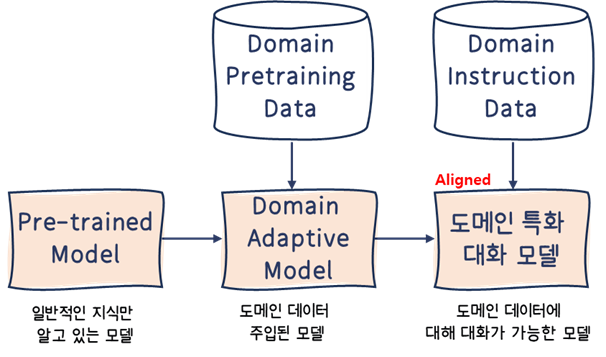


#### 1-1 Domain Adaptive Pretraining 데이터 만들기

- 방법: Namuwiki에서 특정 주제를 선택하고, 질문과 답변을 생성 후, *'data/stage1. domain_adaptive_pretraining/도메인_주제.csv'*로 업로드

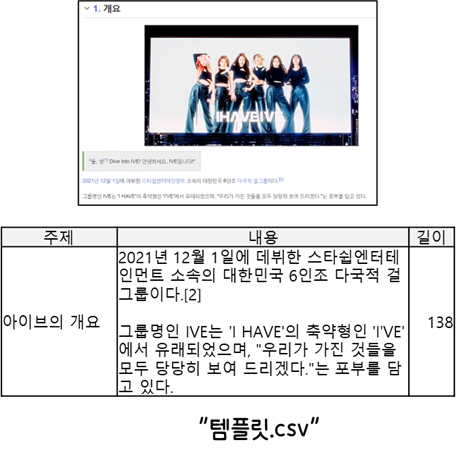

In [ ]:
# 3: 직접 만든 Pre-training 데이터 읽기(csv 파일)

import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_adaptive_pretraining/아이브.csv") # 아이브.csv -> 본인이 만든 파일 위치로 수정

In [ ]:
# 4: 데이터 살펴보기
data.head()

,주제,내용,길이
0,아이브의 개요,2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸...,138
1,아이브의 멤버,"안유진, 가을, 레이, 장원영, 리즈, 이서",24
2,아이브의 콘셉트1,청순 콘셉트를 지나 다시금 걸 크러시 콘셉트가 트렌드로 돌아온 4세대 걸그룹답게 I...,405
3,아이브의 콘셉트2,사실 이 차별화는 현재 걸크러시 콘셉트로 활동하는 걸그룹 대부분에게 해당되는 말이긴...,380
4,아이브의 콘셉트3,연타석 홈런을 친 데뷔 싱글 1집 타이틀곡 <ELEVEN>과 싱글 2집 타이틀곡 <...,269


In [ ]:
# 5: 데이터 갯수 찍어보기
print(len(data))

25


In [ ]:
# 6: 데이터 전처리

# 주제만 가지고 학습을 위한 Prompt 형식으로 변환합니다.
def prompting(topic):
    return f"다음 주제에 대하여, 위키피디아에 있는 정보를 어떠한 수정 없이 그대로 복원해주세요.\n주제:{topic}\n"

# 학습에 사용되는 포맷인 jsonl 타입으로 변경합니다
instruction = []
for a in data.iterrows():
    topic = a[1]['주제']
    output = a[1]['내용']
    instruction.append({'instruction': prompting(topic), 'output': output})

print(instruction[0]['instruction'])
print("--"*10)
print(instruction[0]['output'])

다음 주제에 대하여, 위키피디아에 있는 정보를 어떠한 수정 없이 사실대로 말해주세요.
주제:아이브의 개요

--------------------
2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸그룹이다.[2]

그룹명인 IVE는 'I HAVE'의 축약형인 'I'VE'에서 유래되었으며, "우리가 가진 것들을 모두 당당히 보여 드리겠다."는 포부를 담고 있다.


In [ ]:
# 7: 파일 저장

# 반드시 이름 수정!!
with open("/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_adaptive_pretraining/domain_adaptive_pretrain_ive.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in instruction: file.write(json.dumps(i, ensure_ascii=False) + "\n")

#### 1-2 General KoGPT2 모델 테스트

In [3]:
# 8: 필수 라이브러리 설치 (< 5 mins, Dependency 에러 무시)
# 세션 재시작하라는 메시지 뜨면 세션 재시작

!pip install -r /content/drive/MyDrive/mygpt-lecture/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.7/686.7 kB 58.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.0/396.0 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/

In [2]:
# 9: 필요 라이브러리 import

import torch
import torch.nn as nn
from torch.utils.data import Dataset
from datasets import load_dataset
import transformers
from transformers import AutoTokenizer, AutoConfig, AutoModelForCausalLM, pipeline, PreTrainedTokenizerFast, Trainer, TrainingArguments
from copy import deepcopy
from torch.optim import Adam
import pandas as pd
import argparse
import copy
import logging
import json
from dataclasses import dataclass, field

import sys
CODE_PATH="/content/drive/MyDrive/mygpt-lecture/code/"
if CODE_PATH not in sys.path:
    sys.path.append(CODE_PATH)

from utils import SFT_dataset, DataCollatorForSupervisedDataset
from typing import Optional, Dict, Sequence
import jsonlines

In [12]:
# 10: Vanila KoGPT 모델 로드

tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

model = AutoModelForCausalLM.from_pretrained('skt/kogpt2-base-v2').to('cuda')

print(tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o"))

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


['▁안녕', '하', '세', '요.', '▁한국어', '▁G', 'P', 'T', '-2', '▁입', '니다.', '😤', ':)', 'l^o']


In [13]:
# 11: Vanila Model의 추론 테스트

generator_skt_gpt = pipeline('text-generation', model=model, tokenizer=tokenizer, device=model.device)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=256,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

list_prompt = [ '동해물과 백두산이', '불고기 요리 만드는 방법 알려줘']

list_result = generator_skt_gpt(list_prompt, **generation_args)
for prompt, result in zip(list_prompt, list_result):
    print('#'*70)
    print("[질문]:\n" + prompt)
    print('[답변]:\n' + result[0]['generated_text'].replace(prompt, ""))

######################################################################
[질문]:
동해물과 백두산이
[답변]:
 만나는 지점에 위치해 있다.
이번 협약으로 양 기관은 ▲지역특화 관광상품 개발 및 공동 마케팅 ▲관광인프라 구축 ▲관광산업 발전을 위한 협력체계 구축 등에 적극 협력하기로 했다.
특히 이번 협약 체결을 통해 양 기관은 지역 특성에 맞는 맞춤형 관광상품을 개발해 관광객 유치에 적극 나설 방침이다.
김영석 한국관광공사 강원지역본부장은 “이번 협약을 계기로 양 기관 간 상호협력이 더욱 확대될 것으로 기대된다”며 “앞으로도 양 기관이 상생할 수 있는 방안을 마련하겠다”고 말했다. 지난해 12월 30일부터 올해 1월 2일까지 한 달 동안 서울, 경기, 인천 등 수도권 아파트 매매가격 변동률은 -0.01%를 기록했다.
서울은 0.02%, 신도시는 0.03%의 변동률을 보였다.
부동산114는 "지난해 12월 31일 이후 4주 연속 보합세를 이어가고 있다"며 "매수자들의 관망세가 짙어지면서 거래도 주춤한 상황"이라고 분석했다.
신도시와 경기·인천은 각각 0.07%, 0.05%의 변동률을 나타냈다.
수도권 아파트 전셋값 변동률은 0.01%로 집계됐다.
서울과 신도시의 전셋값 상승률은 각각 0.08%, 0.06%였다.
전셋값이 가장 많이 오른 곳은 하남시(0.13%)로
######################################################################
[질문]:
불고기 요리 만드는 방법 알려줘
[답변]:
요."
"그럼 한 번 해볼까요?"
"아니야. 그건 네가 가르쳐줄게. 너는 뭐든지 할 수 있잖아."
"그래, 알았어. 넌 정말 잘하고 있어."
"네 말이 맞아. 하지만 난 네가 시키는 대로 할 거야."
"네가 시키는 대로 하면 돼."
"알았어, 알았어."
"무슨 일이에요?"
나는 고개를 끄덕였다.
"좋아. 네가 하는 대로 하겠지."
"정말 잘하고 있어. 나도 네가 해야 할

#### 1-3 사전 학습 + General 도메인에 대한 대화 데이터 학습이 끝난 모델 테스트

General instruction fine-tuned model

In [14]:
# 12: General Instruction Model 로드
tokenizer = PreTrainedTokenizerFast.from_pretrained("hyunjae/skt-kogpt2-kullm-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

model = AutoModelForCausalLM.from_pretrained('hyunjae/skt-kogpt2-kullm-v2').to('cuda')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [15]:
# 13: General Instruction Model 추론 테스트
generator_general_model = pipeline('text-generation', model=model, tokenizer=tokenizer, device=model.device)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=256,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

list_prompt = ['동해물과 백두산이', '불고기 요리 만드는 방법 알려줘']

#### 학습때 사용한 프롬프트 형태대로 입력 필수 ####
PROMPT= "### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:{instruction}\n### 응답:"
prompt_list = [ PROMPT.format_map({'instruction':x}) for x in list_prompt]

list_result = generator_general_model(prompt_list, **generation_args)
for prompt, result in zip(prompt_list, list_result):
    print('#'*70)
    print("[질문]:\n" + prompt)
    print('[답변]:\n' + result[0]['generated_text'].replace(prompt, ""))

######################################################################
[질문]:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:동해물과 백두산이
### 응답:
[답변]:
물론이죠! 다음은 중국과 네팔 간의 국경 간 화해를 촉진하는 데 도움이 될 수 있는 몇 가지 전략입니다:1. 언어 장벽 해결: 국경을 넘는 사람들이 서로 소통할 수 있도록 허용하면 해당 지역의 언어와 문화를 더 잘 이해하고 존중할 수 있습니다.2. 문화 교류 촉진: 국경을 넘는 사람들 간의 문화 교류와 협력을 장려하면 양국 간의 이해와 이해를 증진하는 데 도움이 됩니다.3. 지역 안보 증진: 국경을 넘는 사람들의 안전과 보안을 보장하는 것은 양국 간의 평화와 안보를 유지하는 데 필수적입니다.4. 경제 협력 강화: 국경을 넘는 사람들에게 경제적 인센티브와 지원을 제공하면 현지 비즈니스에 대한 접근성을 높이고 현지 경제를 활성화할 수 있습니다.5. 교육 및 인식 제고: 국경을 넘는 사람들을 위한 교육과 인식 개선은 양국 간의 이해와 협력을 증진하는 데 중요한 역할을 할 수 있습니다.이러한 전략을 실행함으로써 두 나라 간의 화해를 촉진하고 공동의 목표를 향해 노력할 수 있습니다.
######################################################################
[질문]:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:불고기 요리 만드는 방법 알려줘
### 응답:
[답변]:
불고기 요리를 만드는 간단한 레시피를 소개합니다:

재료
- 불고기 1 파운드
- 다진 큰 양파 1개
- 다진 마늘 2쪽
- 올리브 오일 2 큰술
- 소금과 후추, 맛보기
- 맛볼 소금과 후추
- 장식용 신선한 파슬리

지침

1. 큰 냄비나 더치 오븐에 올리브 오일을 두르고 중간 불에 올립니다.
2. 양파와 마늘을 넣고 부드러워질 때까지 약 5분간 조리합니다

#### 1-4 Domain Adaptive Pretraning 하기


In [ ]:
# 14: Domain Adaptive Pre-training을 위한 데이터 로드

train_dataset = SFT_dataset(data_path='/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_adaptive_pretraining/domain_adaptive_pretrain_ive.jsonl', tokenizer=tokenizer)
eval_dataset  = None  # eval은 안함
data_collator = DataCollatorForSupervisedDataset(tokenizer=tokenizer)

### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:다음 주제에 대하여, 위키피디아에 있는 정보를 어떠한 수정 없이 사실대로 말해주세요.
주제:아이브의 개요

### 응답:
2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸그룹이다.[2]

그룹명인 IVE는 'I HAVE'의 축약형인 'I'VE'에서 유래되었으며, "우리가 가진 것들을 모두 당당히 보여 드리겠다."는 포부를 담고 있다.</s>
Tokenizing inputs... This may take some time...


In [ ]:
# 15: 학습 파라미터 설정
output_dir="/content/drive/MyDrive/mygpt-lecture/output/domain_adaptive_model"
training_args = TrainingArguments(
    output_dir=output_dir,
    overwrite_output_dir=True,
    num_train_epochs= 30,
    gradient_accumulation_steps= 1,
    learning_rate=3e-5,
    per_device_train_batch_size= 6,
    logging_steps=1,
    prediction_loss_only=True,
    fp16=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

In [ ]:
# 16: 학습 시작 & 저장

trainer.train()
trainer.save_model(output_dir) # 학습이 끝나면 모델 저장

Step,Training Loss
1,5.146000
2,5.228700
3,4.930500
4,4.515400
5,4.667400
6,3.767200
7,4.201000
8,3.862600
9,3.856700
10,4.123200


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 50, 'do_sample': True}


#### 1-5 General Insturuction Model vs Domain Adaptive Pretraining Model 비교

In [16]:
# 17: Domain 정보가 없는 모델을 가지고 추론 테스트

generator_general = pipeline('text-generation', model="hyunjae/skt-kogpt2-kullm-v2", tokenizer=tokenizer)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=128,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

PROMPT= "### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:{instruction}\n### 응답:"

list_prompt = ['불고기 요리 만드는 방법 알려줘', '아이브는 총 몇명이야?'] # 특정 도메인에 대한 질문을 포함시켜주세요.
list_prompt = [PROMPT.format_map({'instruction' : tmp}) for tmp in list_prompt]

list_result = generator_general(list_prompt, **generation_args)
for prompt, result in zip(list_prompt, list_result):
    print('#'*70)
    print("[질문]:\n" + prompt)
    print('[답변]:\n' + result[0]['generated_text'].replace(prompt, ""))

######################################################################
[질문]:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:불고기 요리 만드는 방법 알려줘
### 응답:
[답변]:
불고기 요리를 만드는 방법은 다음과 같습니다:

1. 불고기 소스를 준비합니다: 불고기 소스는 갈은 소고기, 돼지고기, 양파, 버섯 등 다양한 종류의 고기를 사용할 수 있습니다.

2. 야채를 넣습니다: 야채와 함께 야채를 냄비에 넣고 야채가 부드러워질 때까지 약 5분간 조리합니다.

3. 불고기 소스의 물기를 빼고 헹굽니다: 큰 프라이팬에 올리브 오일을 두르고 중간 불에 올립니다.

4. 불고기 소스에 소금과 후추로 간을 합니다: 원하는 경우 소금, 후추로 간을 맞춥니다.

5. 불고기 소스가 익는 동안
######################################################################
[질문]:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브는 총 몇명이야?
### 응답:
[답변]:
죄송하지만 저는 AI 언어 모델이기 때문에 실시간 데이터에 액세스할 수 있는 기능이 없습니다. 아이브의 총 수는 사용자의 특정 요구 사항과 선호도에 따라 달라질 수 있습니다.


In [19]:
# 18: Domain Adaptive Pre-train 시킨 모델을 가지고 추론 테스트

generator_general_domain_adaptive = pipeline('text-generation', model=output_dir, tokenizer=tokenizer)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=128,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

# 특정 도메인에 대해서 사전학습 된 모델의 성능을 알아보자!
list_prompt =['불고기 요리 만드는 방법 알려줘', '아이브는 총 몇명이야?'] # 특정 도메인에 대한 질문을 포함시켜주세요.
list_prompt = [PROMPT.format_map({'instruction' : tmp}) for tmp in list_prompt]

list_result = generator_general_domain_adaptive(list_prompt, **generation_args)
for prompt, result in zip(list_prompt, list_result):
    print('#'*70)
    print("[질문]:\n" + prompt)
    print('[답변]:\n' + result[0]['generated_text'].replace(prompt, ""))

######################################################################
[질문]:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:불고기 요리 만드는 방법 알려줘
### 응답:
[답변]:
불고기 요리는 일반적으로 소고기, 돼지고기, 닭고기, 칠면조 등 다양한 고기를 사용하여 만듭니다. 각 고기는 양파, 마늘, 생강, 완두콩, 쪽파 등의 야채와 함께 제공되는 경우가 많다. 소고기와 돼지고기로 맛을 낸다고 생각하면 된다.

만드는 방법은 다음과 같습니다:

1. 오븐을 400°F(200°C)로 예열합니다.
2. 큰 프라이팬에 기름을 두르고 중간보다 센 불에 올립니다.
3. 3. 갈은 소고기를 넣고 부드러워질 때까지 약 5분간 조리합니다.
4. 4. 불고기 위에 소고기 혼합물을 붓고 골고루 펴 바릅니다.
5.
######################################################################
[질문]:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브는 총 몇명이야?
### 응답:
[답변]:
2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸그룹이다.[2]

그룹명인 IVE는 'I HAVE'의 축약형인 'I'VE'에서 유래되었으며, "우리가 가진 것들을 모두 당당히 보여 드리겠다."는 포부를 담고 있다.


#### 1-6 특정 Domain에 대한 대화 데이터 학습 시키기

##### Domain instruction Finetuning 용 데이터 만들기

In [ ]:
# 19: (런타임 연결 해제 및 삭제 시) 라이브러리 설치
!pip install openai

In [20]:
# 20: ChatGPT API 테스트

from openai import OpenAI
import os
os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "안녕? 자기소개 좀 해줄래?"},
  ]
)

print(response.choices[0].message.content)

안녕하세요! 저는 도와주는 인공지능 어시스턴트입니다. 여러분의 질문에 답변하고 도움을 주는 것을 즐기고 있어요. 궁금한 것이 있거나 도움이 필요하시면 언제든지 말씀해주세요!


In [ ]:
# 21: 자신이 만든 사전학습 데이터 읽어오기!!

import json

data=[]
for a in open("/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_adaptive_pretraining/domain_adaptive_pretrain_ive.jsonl", 'r'):
    data.append(json.loads(a))

print(data[0]['instruction'])
print(data[0]['output'])

다음 주제에 대하여, 위키피디아에 있는 정보를 어떠한 수정 없이 사실대로 말해주세요.
주제:아이브의 개요

2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸그룹이다.[2]

그룹명인 IVE는 'I HAVE'의 축약형인 'I'VE'에서 유래되었으며, "우리가 가진 것들을 모두 당당히 보여 드리겠다."는 포부를 담고 있다.


In [23]:
# 22: ChatGPT에게 보낼 Prompt 설정

# ChatGPT에게 여러번 물어보면 그만큼 돈과 시간이 많이 들겠죠?
# 따라서 10개의 질문/정답 쌍을 한번에 받습니다!

PROMPT="다음 주제와 내용을 보고 답변 할 수 있는 창의적이고 재밌는 질문과 상세한 정답 쌍을 10개 만들어줘.\n\
- 주제:{title}\n\
- 내용:{content}\n\
\n\
답변은 반드시 아래 형태를 띄어야 해.\n\
Q1:질문\n\
A1:정답\n\
\n\
Q2:질문\n\
A2:정답\n\
\n\
Q3:질문\n\
A3:정답\n\
\n\
Q4:질문\n\
A4:정답\n\
\n\
Q5:질문\n\
A5:정답\n\
...\n\
Q10:질문\n\
A10:정답\n\
"

print(PROMPT)

다음 주제와 내용을 보고 답변 할 수 있는 창의적이고 재밌는 질문과 상세한 정답 쌍을 10개 만들어줘.
- 주제:{title}
- 내용:{content}

답변은 반드시 아래 형태를 띄어야 해.
Q1:질문
A1:정답

Q2:질문
A2:정답

Q3:질문
A3:정답

Q4:질문
A4:정답

Q5:질문
A5:정답
...
Q10:질문
A10:정답



In [ ]:
# 23: 데이터 담을 리스트 생성
qa_data = []
error_data = []

In [ ]:
# 24: ChatGPT API를 통해 데이터 얻어오기

# 중간에 에러가 나면 error_data에 넣어두고, 아래 for_loop의 data -> error_data 로 고쳐서 다시 돌려도 됨!!
# 데이터에 민감 정보가 있을 경우 에러가 날 수 있습니다!!

from tqdm import tqdm

for a in tqdm(data):
    title = a['instruction'].split("주제:")[-1]
    content = a['output']
    try:
        response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {'role':"user","content":PROMPT.format_map({'title':title, 'content':content})},
            ]
        )
        qa_data.append(response.choices[0].message.content)

    except Exception as e:
        error_data.append(a)
        print(title)
        print(e)

100%|██████████| 25/25 [06:47<00:00, 16.28s/it]


In [ ]:
# 25: 학습이 시작되는 동안 직접 데이터를 만들어 볼까요?
hand_written_data = [
    {'instruction': "아이브의 멤버 중 반민초파는 누구이고, 반민초파라는 단어의 의미는 무엇입니까?",
    'output' : "아이브의 멤버 중 반민초파는 가을, 리즈로 알려져 있습니다. 반민초파라는 단어의 의미는 민초가 들어간 음식을 좋아하지 않는다는 의미입니다."
    }
    {'instruction': "",
    'output' : ""
    },
    {'instruction': "",
    'output' : ""
    }
    ### 이어서 작성
]

In [ ]:
# 26: chatgpt의 응답에서 Q와 A를 발라냅니다.
instruction_data=[]
for a in qa_data:
    try:
        for i, b in enumerate(a.split("\n\n")):
            i +=1
            q = b.split("Q"+str(i)+":")[1].split("\nA"+str(i)+":")[0].lstrip()
            ans = b.split("A"+str(i)+":")[1].split("\n\nQ"+str(i)+":")[0].lstrip()
            instruction_data.append({'instruction':q,'output':ans})
    except Exception as e:
        print(e)
        continue

In [ ]:
len(instruction_data)

235

In [ ]:
# 27: 잘 만들어졌는지 볼까요?
import random
random_sample=random.sample(instruction_data, 1)[0]
print(random_sample['instruction'])
print(random_sample['output'])

IVE의 빠르고 안정적인 성과를 이끈 원동력은 무엇이었나요?
안유진과 장원영의 팬덤 화력, 그리고 신규팬덤의 화력을 통해 빠르고 안정적으로 성과를 이끌었습니다.


In [ ]:
# 28: 직접 만든 데이터와 ChatGPT가 만든 데이터를 합칩니다.

instruction_data.extend(hand_written_data)
random.shuffle(instruction_data)

In [ ]:
# 29: Train/Test로 적당히 나눕니다.
import random
test_data=instruction_data[:-20]
train_data=instruction_data[-20:]

In [ ]:
# 30: 알맞은 이름으로 저장
import json

# ive 대신 이름을 바꿔주세요!!!!!!!!!!!!!!!!!!!!
with open("/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_train.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in train_data: file.write(json.dumps(i , ensure_ascii=False) + "\n")

with open("/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_test.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in test_data: file.write(json.dumps(i, ensure_ascii=False) + "\n")

##### 만들어진 데이터로 학습 시작!

In [ ]:
# 31: # (세션이 끊겼으면) 필수 라이브러리 재설치 (< 5 mins, Dependency 에러 무시)

!pip install -r /content/drive/MyDrive/mygpt-lecture/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.7/686.7 kB 56.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.0/396.0 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/

In [24]:
# 32: 필요 라이브러리 import

import torch, argparse, copy, logging, json
import torch.nn as nn
from torch.utils.data import Dataset
from datasets import load_dataset
import transformers
from transformers import AutoTokenizer, AutoConfig, AutoModelForCausalLM, pipeline, PreTrainedTokenizerFast, Trainer, TrainingArguments
from copy import deepcopy
from torch.optim import Adam
import pandas as pd
from dataclasses import dataclass, field

import sys
CODE_PATH="/content/drive/MyDrive/mygpt-lecture/code/"
if CODE_PATH not in sys.path:
    sys.path.append(CODE_PATH)

from utils import SFT_dataset, DataCollatorForSupervisedDataset
from typing import Optional, Dict, Sequence
import jsonlines

In [ ]:
# 33: Domain Adaptive Pretraining이 된 모델 로드

# 토크나이저는 그대로 씁니다.
tokenizer = PreTrainedTokenizerFast.from_pretrained("hyunjae/skt-kogpt2-kullm-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

model = AutoModelForCausalLM.from_pretrained("/content/drive/MyDrive/mygpt-lecture/output/domain_adaptive_model").to('cuda')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [ ]:
# 34: instruction dataset 로드

# 본인이 만든 파일로 이름 변경!!
train_dataset = SFT_dataset(data_path='/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_train.jsonl', tokenizer=tokenizer)
eval_dataset  = SFT_dataset(data_path='/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_test.jsonl', tokenizer=tokenizer)
data_collator = DataCollatorForSupervisedDataset(tokenizer=tokenizer)

### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브는 어떤 소속사에 소속되어 있나요?
### 응답:
아이브는 스타쉽엔터테인먼트에 소속되어 있습니다.</s>
Tokenizing inputs... This may take some time...


### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브의 소속사는 어떤 엔터테인먼트 기업인가요?
### 응답:
아이브의 소속사는 스타쉽엔터테인먼트입니다.</s>
Tokenizing inputs... This may take some time...


In [ ]:
# 35: 학습을 위한 파라미터 설정

output_dir="/content/drive/MyDrive/mygpt-lecture/output/domain_instruction_tuning"
training_args = TrainingArguments(
    output_dir=output_dir,
    overwrite_output_dir=True,
    num_train_epochs= 15,
    gradient_accumulation_steps= 1,
    learning_rate=5e-6,
    per_device_train_batch_size= 6,
    per_device_eval_batch_size= 6,
    eval_steps=30,
    evaluation_strategy='steps',
    logging_steps=1,
    prediction_loss_only=True,
    fp16=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# 36: 학습 시작

trainer.train()
trainer.save_model(output_dir) # 저장

Step,Training Loss,Validation Loss
30,1.785800,1.476605
60,1.412500,1.398516
90,0.947300,1.369852
120,0.970000,1.364181
150,0.886900,1.352479
180,1.149800,1.354161
210,0.854300,1.360824
240,0.902700,1.361468
270,0.616300,1.367919
300,0.687000,1.377076


In [ ]:
# 37: 추론 테스트를 위한 모델 & 설정 로드
generator_instruction_tuning = pipeline('text-generation', model=output_dir, tokenizer=tokenizer)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id, # \n
    max_new_tokens=256,
    do_sample=True,
    top_k=50,
    early_stopping=True
)


In [ ]:
# 38: 아까 만든 데이터를 로드해서 테스트 해봅니다!
list_test = open("/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_test.jsonl", 'r')
test_data = [json.loads(x) for x in list_test]

PROMPT= "### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:{instruction}\n### 응답:"

list_prompt = [ x['instruction'] for x in test_data]
list_prompt = [PROMPT.format_map({'instruction' : tmp}) for tmp in list_prompt]
chatgpt_answer = [ x['output'] for x in test_data]

list_result = generator_instruction_tuning(list_prompt, **generation_args)

index=1
for prompt, result, answer in zip(list_prompt, list_result, chatgpt_answer):
    print("Case {}".format(index))
    print(('-'*70))
    print(prompt)
    print('Model output: %s'%(result[0]['generated_text'].replace(prompt,"")))
    print("ChatGPT output:", answer)
    index +=1

Case 1
----------------------------------------------------------------------
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브의 소속사는 어떤 엔터테인먼트 기업인가요?
### 응답:
Model output: 스타쉽엔터테인먼트
ChatGPT output: 아이브의 소속사는 스타쉽엔터테인먼트입니다.
Case 2
----------------------------------------------------------------------
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:장원영의 생년월일은 언제인가요?
### 응답:
Model output: 2021년 12월 1일에 태어났습니다.
ChatGPT output: 장원영의 생년월일은 2004년 8월 31일입니다.
Case 3
----------------------------------------------------------------------
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브와 (여자)아이들은 어떤 차이점이 있나요?
### 응답:
Model output: 아이브는 주로 랩과 힙합에 가까운 구성을 갖추고 있습니다.
ChatGPT output: 아이브는 보컬의 비중이 높은 음악을 내세우고 있지만, (여자)아이들은 콘셉트추얼함과 자체 제작으로 승부를 보며 음악에 어필합니다.
Case 4
----------------------------------------------------------------------
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:어떤 멤버들이 IVE의 성장을 도왔나요?
### 응답:
Model output: IVE는 멤버 전원이 코로나19 확진 판정을 받은 적이 있습니다.
ChatGPT output: 안유진과 장원영 외에도 아이즈원 출신이 아닌 새로운 멤

### Stage 2. Reward Model 만들기

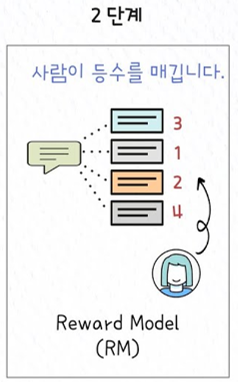

##### 학습용 데이터 만들기

Data Format

data = [{'prompt':"질문", 'chosen':"더 우수한 답변", 'reject':"덜 우수한 답변"}]

In [2]:
# 39: 위에서 만든 instruction 데이터 읽어오기!!
import json

# 파일 이름 주의!
instruction_data=[]
for a in open("/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_train.jsonl", 'r'):
    instruction_data.append(json.loads(a))

In [3]:
# 40: 일단 위에서 만든 데이터에서 질문만 뽑아보자
questions = [a['instruction'] for a in instruction_data]
print("질문 예시:", questions[0])
print("질문 갯수:", len(questions))

질문 예시: 아이브는 어떤 소속사에 소속되어 있나요?
질문 갯수: 223


In [4]:
# 41: 질문을 10개 단위로 쪼개기
question_list = ["Q" + str((i%10)+1)+":" + q  for i, q in enumerate(questions)]

question_set =[]
for i in range(0, len(question_list), 10):
    question_set.append("\n".join(question_list[i:i+10]))

print("전체 질문 Set 갯수: ", len(question_set))
print("질문 Set 예시:\n", question_set[0])

전체 질문 Set 갯수:  23
질문 Set 예시:
 Q1:아이브는 어떤 소속사에 소속되어 있나요?
Q2:아이브는 몇 명으로 이루어져 있나요?
Q3:아이브의 데뷔일은 언제인가요?
Q4:IVE의 그룹명은 어떤 의미를 가지고 있나요?
Q5:아이브는 어떤 국적을 가진 걸그룹인가요?
Q6:아이브의 데뷔 후 첫 음악 프로그램 1위는 언제였나요?
Q7:아이브의 멤버는 누구들인가요?
Q8:아이브의 음악 스타일은 어떤 특징이 있나요?
Q9:아이브는 데뷔 후 어떤 활동을 할 예정인가요?
Q10:아이브의 멤버는 누구인가요?


In [5]:
# 42: ChatGPT에게 물어볼 프롬프트 형식

# 좋은 데이터를 만들기 위한 Prompt는 아래와 같았습니다.
# "다음 주제와 내용을 보고 답변 할 수 있는 창의적이고 재밌는 질문과 상세한 정답 쌍을 10개 만들어줘."

# 나쁜 데이터를 만들기 위해 Prompt를 조작해 봅시다!!
PROMPT="지금부터 여러개의 질문이 주어집니다. 주어진 질문들에 대해서 뻔하고 재미없으며 다소 부정확한 답변을 해주세요.\n\
### 질문들 ###\n\
{questions}\n\
-------------------\n\
각 답변은 아래와 같은 형식으로 답변해야 합니다.\n\n\
A1: 답변\n\
A2: 답변\n\
A3: 답변\n\
A4: 답변\n\
A5: 답변\n\
...\n\
A10: 답변"

print(PROMPT.format_map({'questions':question_set[0]}))

지금부터 여러개의 질문이 주어집니다. 주어진 질문들에 대해서 뻔하고 재미없으며 다소 부정확한 답변을 해주세요.
### 질문들 ###
Q1:아이브는 어떤 소속사에 소속되어 있나요?
Q2:아이브는 몇 명으로 이루어져 있나요?
Q3:아이브의 데뷔일은 언제인가요?
Q4:IVE의 그룹명은 어떤 의미를 가지고 있나요?
Q5:아이브는 어떤 국적을 가진 걸그룹인가요?
Q6:아이브의 데뷔 후 첫 음악 프로그램 1위는 언제였나요?
Q7:아이브의 멤버는 누구들인가요?
Q8:아이브의 음악 스타일은 어떤 특징이 있나요?
Q9:아이브는 데뷔 후 어떤 활동을 할 예정인가요?
Q10:아이브의 멤버는 누구인가요?
-------------------
각 답변은 아래와 같은 형식으로 답변해야 합니다.

A1: 답변
A2: 답변
A3: 답변
A4: 답변
A5: 답변
...
A10: 답변


In [6]:
# 43: openai library 설치
!pip install openai

from tqdm import tqdm
from openai import OpenAI
import os
os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.7 MB/s eta 0:00:00


In [8]:
# 44: 데이터를 담을 리스트
bad_qa=[]
bad_qa_error=[]

In [9]:
# 45: ChatGPT API를 통해 데이터 얻어오기

# 중간에 에러가 나면 error_data에 넣어두고, 아래 for_loop의 data -> error_data 로 고쳐서 다시 돌려도 됨!!
# 데이터에 민감 정보가 있을 경우 에러가 날 수 있습니다!!

for questions in tqdm(question_set):
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                    {"role": "system", "content": "You are a helpful assistant."},
                    {'role':"user","content": PROMPT.format_map({'questions':questions})}
            ],
            temperature=1
        )

        bad_qa.append({'instruction': questions,  'output':response.choices[0].message.content})
    except Exception as e:
        bad_qa_error.append(a)
        print(e)

100%|██████████| 23/23 [01:42<00:00,  4.46s/it]


In [10]:
# 46: 데이터가 만들어지는 동안 직접 만들어보기!
hand_written_dataset=[
    {'prompt': '아이브와 아이유의 차이는 무엇인가요?',
    'chosen': '아이브는 2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸그룹입니다. 아이유는 개인으로 활동하는 대한민국의 싱어송라이터 입니다.',
     'rejected': '아이브와 아이유는 아씨 성을 가진 자매입니다.'},
    {'prompt': '질문',
    'chosen': '좋은 답변',
     'rejected': '나쁜 답변'}
    #...
]

In [11]:
print(bad_qa[0]['instruction'])

Q1:아이브는 어떤 소속사에 소속되어 있나요?
Q2:아이브는 몇 명으로 이루어져 있나요?
Q3:아이브의 데뷔일은 언제인가요?
Q4:IVE의 그룹명은 어떤 의미를 가지고 있나요?
Q5:아이브는 어떤 국적을 가진 걸그룹인가요?
Q6:아이브의 데뷔 후 첫 음악 프로그램 1위는 언제였나요?
Q7:아이브의 멤버는 누구들인가요?
Q8:아이브의 음악 스타일은 어떤 특징이 있나요?
Q9:아이브는 데뷔 후 어떤 활동을 할 예정인가요?
Q10:아이브의 멤버는 누구인가요?


In [12]:
print(bad_qa[0]['output'])

A1: JYP 엔터테인먼트
A2: 10명
A3: 2021년 12월 1일
A4: 무의미한 약자
A5: 라티노 국적
A6: 저녁 8시
A7: 아이스트, 아이엘, 아이워
A8: 헤비메탈
A9: 우주 여행
A10: 아바타, 아이언맨, 아이스크림


In [13]:
len(bad_qa)

23

In [14]:
# 47: 질문과 답변만 뽑자
bad_instruction_data=[]
for x in bad_qa:

    q_s = x['instruction'].replace("\n\n","\n").split("\n")
    a_s = x['output'].replace("\n\n","\n").split("\n")

    for qq, aa in zip(q_s, a_s):
        question = qq.split(":")[1].strip()
        answer = aa.split(":")[1].strip()
        bad_instruction_data.append({"instruction":question, "output": answer})

In [19]:
# 48: Bad instruction 과 good instruction의 갯수가 같아야 함

assert len(bad_instruction_data)== len(instruction_data) # GPT 답변을 뽑을 때 에러가 나면 답변의 숫자가 다를 수 있음

In [21]:
# 49: (질문, 좋은 답변, 나쁜 답변)을 묶어서 학습 데이터를 만들자

reward_model_data=[]
for good in instruction_data:
    question = good['instruction']
    good_answer =  good['output']
    for bad in bad_instruction_data:
        if question == bad['instruction']:
            bad_answer = bad['output']
            reward_model_data.append({'prompt': question, 'chosen': good_answer, 'rejected': bad_answer})
            break

print("Total Data Count:", len(reward_model_data))

Total Data Count: 223


In [22]:
# 50: 학습/평가 데이터로 나누기
import random
random.shuffle(reward_model_data)
train_rm = reward_model_data[:-20]
test_rm = reward_model_data[-20:]

In [23]:
# 51: 저장 (이름 바꿔주세요!!!!)

import json
with open("/content/drive/MyDrive/mygpt-lecture/data/stage2. RM/ive_train_rm.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in train_rm: file.write(json.dumps(i, ensure_ascii=False) + "\n")

with open("/content/drive/MyDrive/mygpt-lecture/data/stage2. RM/ive_test_rm.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in test_rm: file.write(json.dumps(i, ensure_ascii=False) + "\n")

##### Reward Model 학습 시작

In [24]:
# 52: 필수 라이브러리 재설치
!pip install -r /content/drive/MyDrive/mygpt-lecture/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.7/686.7 kB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.0/396.0 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━

In [2]:
# 53: 필요 라이브러리 mport

import os
import json
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.optim import AdamW

from datasets import load_dataset
from transformers import PreTrainedTokenizerFast

import sys
CODE_PATH="/content/drive/MyDrive/mygpt-lecture/code/"
if CODE_PATH not in sys.path:
    sys.path.append(CODE_PATH)

from chatgpt.dataset import RewardDataset
from chatgpt.models.base import RewardModel
from chatgpt.trainer import RewardModelTrainer
from chatgpt.trainer.strategies import ColossalAIStrategy, DDPStrategy, NaiveStrategy
from datasets import load_dataset
from chatgpt.models.gpt.gpt_rm import GPTRM

from colossalai.nn.optimizer import HybridAdam

In [18]:
# 54: Reward Model로 학습시킬 모델 로드
tokenizer = PreTrainedTokenizerFast.from_pretrained("hyunjae/skt-kogpt2-kullm-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

model = GPTRM(pretrained="hyunjae/kogpt2_reward_model").to('cuda')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [4]:
# 55: Reward Model 학습/테스트 용 데이터 로드
train_rm=[]
for a in open("/content/drive/MyDrive/mygpt-lecture/data/stage2. RM/ive_train_rm.jsonl", 'r'):
    train_rm.append(json.loads(a))

test_rm=[]
for a in open("/content/drive/MyDrive/mygpt-lecture/data/stage2. RM/ive_test_rm.jsonl", 'r'):
    test_rm.append(json.loads(a))

In [5]:
# 56: 데이터 찍어보기
print(train_rm[-1])

# 데이터 크기 찍어보기
print("Train set size:", len(train_rm))
print("Test set size:", len(test_rm))

{'prompt': '아이브의 댄스는 타 그룹과 비교할 때 어떤 점이 눈에 띄나요?', 'chosen': '아이브의 댄스는 타 그룹과 비교해서도 뛰어난 리듬감을 가지고 있습니다.', 'rejected': '아이브의 댄스는 각자의 개성과 특색이 돋보이는 특징이 있을 것으로 생각해요.'}
Train set size: 203
Test set size: 20


In [6]:
# 57: 데이터 전처리

# 질문(prompt)에 System Prompt를 추가합니다.
# 본인이 선택한 도메인에 맞는 System Prompt 입력!!
SYSTEM_PROMPT= "### system: 당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 사실대로 답변하세요.\n### 사용자: {instruction}\n### 응답: "
train = [{'prompt': SYSTEM_PROMPT.format_map({'instruction': a['prompt']}), 'chosen':a['chosen'].strip(), 'rejected':a['rejected'].strip()} for a in train_rm]
test = [{'prompt': SYSTEM_PROMPT.format_map({'instruction': a['prompt']}), 'chosen':a['chosen'].strip(), 'rejected':a['rejected'].strip()} for a in test_rm]
train_dataset = RewardDataset(train, tokenizer, 256)
eval_dataset = RewardDataset(test, tokenizer, 256)

100%|██████████| 20/20 [00:00<00:00, 836.13it/s]


In [9]:
# 58: 데이터 찍어보기
print("질문:", train[1]['prompt'])
print("정답:", train[1]['chosen'])
print("오답:", train[1]['rejected'])

질문: ### system: 당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 사실대로 답변하세요.
### 사용자: 아이브 멤버들 중 누가 캔모아를 모르자 직접 설명해 준 적이 있나요?
### 응답: 
정답: 원영과 이서가 캔모아를 모르자 직접 설명해 주었습니다.
오답: 캔모아를 모르는 멤버는 있을 수 있지만 설명해 준 적은 있는 것으로 알고 있어요.


In [10]:
# 59: 모델 저장 경로 설정
rm_output_path="/content/drive/MyDrive/mygpt-lecture/output/rm_model/"
if not os.path.exists(rm_output_path):
    os.makedirs(rm_output_path)

In [19]:
# 60: Reward Model 학습을 위한 파라미터 설정
strategy = NaiveStrategy()
optim = AdamW(model.parameters(), lr=1e-5)
trainer = RewardModelTrainer(model=model,
                             strategy=strategy,
                             optim=optim,
                             train_dataset=train_dataset,
                             eval_dataset=eval_dataset,
                             batch_size=8,
                             max_epochs=2)

In [20]:
# 61: Reward Model train 시작
trainer.fit(use_lora=0)

Train step of epoch 0: 100%|██████████| 26/26 [00:21<00:00,  1.23it/s, loss=0.292, dist_mean=2.32]

Train step of epoch 1: 100%|██████████| 26/26 [00:21<00:00,  1.20it/s, loss=0.175, dist_mean=4.14]

Train epoch: 100%|██████████| 3/3 [01:04<00:00, 21.50s/it]


In [21]:
# 62: 학습이 끝난 Reward Model 저장

model.model.save_pretrained(rm_output_path)  # config.json 생성

In [22]:
# 63: Test 데이터셋 에 대해 Accuracy 측정해보기

def inference_RM(input_text=None):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(torch.cuda.current_device())
    output = model(input_ids)
    output_reward = output.cpu().detach().numpy()[0]
    return output_reward

correct = 0
for a in test:
    input_text = a['prompt'] + a['chosen']
    print("--------------")
    print("@@@ 좋은 답변")
    output_reward_good = inference_RM(input_text=input_text)
    print(input_text)
    print("### 점수:", output_reward_good)

    input_text =a['prompt'] + a['rejected']
    output_reward_bad = inference_RM(input_text=input_text)
    print("@@@ 나쁜 답변")
    print(input_text)
    print("### 점수:", output_reward_bad)

    if output_reward_good > output_reward_bad:
        correct +=1

--------------
@@@ 좋은 답변
### system: 당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 사실대로 답변하세요.
### 사용자: 아이브 멤버 중에서 서울공연예술고등학교를 졸업한 멤버는 누구인가요?
### 응답: 레이, 장원영
### 점수: 0.17811456
@@@ 나쁜 답변
### system: 당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 사실대로 답변하세요.
### 사용자: 아이브 멤버 중에서 서울공연예술고등학교를 졸업한 멤버는 누구인가요?
### 응답: 누군지는 잘 모르겠어요.
### 점수: -0.3847008
--------------
@@@ 좋은 답변
### system: 당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 사실대로 답변하세요.
### 사용자: 다른 그룹명도 고려됐던 건가요?
### 응답: 네, 멤버들은 어떤 이름이 될지 기대하며 기다리고 있었다.
### 점수: -1.8650887
@@@ 나쁜 답변
### system: 당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 사실대로 답변하세요.
### 사용자: 다른 그룹명도 고려됐던 건가요?
### 응답: 그룹명을 정하기 위해 다양한 그룹명이 고려되었지만, 아이브가 선택되었습니다.
### 점수: -2.0419736
--------------
@@@ 좋은 답변
### system: 당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 사실대로 답변하세요.
### 사용자: 아이브의 비주얼이 왜 유명한가요?
### 응답: 아이브는 자타공인 전원 센터급 비주얼로 유명합니다.
### 점수: 0.054750983
@@@ 나쁜 답변
### system: 당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 사실대로 답변하세요.
### 사용자: 아이브의 비주얼이 왜 유명한가요?
### 응답: 아이브의 비주얼은 논란이 있지만 다양한 스타일을 소화해내어 유명한 편입니다.
### 점수: -0.24723102
--------------


In [24]:
# 64: Test 데이터셋에 대한 Accuracy
correct/len(test)

0.7

### Stage 3. PPO 학습

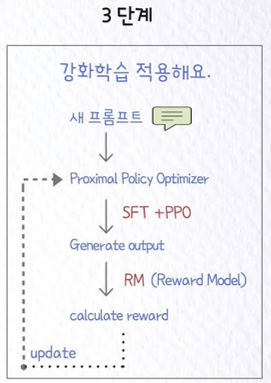

##### PPO용 데이터셋 만들기

질문만 있으면 됨!!

In [ ]:
# 65 (세션이 끊겼으면) 라이브러리 재설치

!pip install openai

In [ ]:
# 66: OpenAI 설정

from openai import OpenAI
import os
os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()

In [ ]:
# 67: 사전학습 데이터 읽어오기

data=[]
for a in open("/content/drive/MyDrive/mygpt-lecture/data/stage1. domain_adaptive_pretraining/domain_adaptive_ive_pretrain.jsonl", 'r'):
    data.append(json.loads(a))

In [ ]:
# 68: 최대한 다양한 질문을 만들어 낼 수 있는 프롬프트로 작성! 하나의 내용당 20개의 질문 요청

PROMPT="다음 주제와 내용을 보고 답변 할 수 있는 다양한 형태와 난이도의 창의적인 질문 20개를 만들어줘.\n\
\n주제:{title}\n내용:{content}\n\
답변의 형태는 다음과 같아.\n\
--------------\n\
\n\
질문1:\n\
질문2:\n\
질문3:\n\
질문4:\n\
질문5:\n\
...\n\
질문20:\n\
"

In [ ]:
print(PROMPT)

다음 주제와 내용을 보고 답변 할 수 있는 다양한 형태와 난이도의 창의적인 질문 20개를 만들어줘.

주제:{title}
내용:{content}
답변의 형태는 다음과 같아.
--------------

질문1:
질문2:
질문3:
질문4:
질문5:
...
질문20:



In [ ]:
# 69: 생성한 데이터를 저장할 리스트
question_only_data=[]
error_data=[]

In [ ]:
# 70: API Call

from tqdm import tqdm
for a in tqdm(data):

    title = a['instruction'].split("주제:")[-1]
    content = a['output']
    try:
       response = client.chat.completions.create(
            model='gpt-3.5-turbo',
            messages=[
                {'role':"system","content":"You are a helpful assistant."},
                {'role':"user","content":PROMPT.format_map({'title':title, 'content':content})},
                ],
            temperature=1 # 다양하게 만들기 위해 Temperature 1로 셋팅
        )
       question_only_data.append(response.choices[0].message.content)
    except Exception as e:
        error_data.append(a)
        print(title)
        print(e)

100%|██████████| 25/25 [08:02<00:00, 19.30s/it]


In [ ]:
print(question_only_data[-1])

--------------

질문1: 멤버들이 데뷔 때와 비슷한 헤어스타일을 한 이유는 무엇인가요?
질문2: 앞으로 활약이 가장 기대되는 4세대 아이돌 중에서 걸그룹 부문 3위를 차지한 이유는 무엇이라고 생각하시나요?
질문3: 멤버들이 모두 코로나19 확진 판정을 받은 적이 있다는데, 이 경험이 그들의 음악 활동에 어떤 영향을 미쳤을까요?
질문4: 서울공연예술고등학교를 중퇴(안유진)하거나 졸업한 멤버들은 학창 시절 어떻게 음악적 역량을 키웠을까요?
질문5: 혈액형이 다양한 이유가 있을까요? 팀 내 혈액형이 다양하게 형성된 것이 그들의 음악적 특기나 개성에 어떤 영향을 미쳤을까요?
질문6: 외동인 멤버가 없다는데, 가족관계에 대해 언급되는 이유가 무엇인가요?
질문7: 걸그룹이 아닌데도 걸그룹 부문에서 상을 받은 이유는 무엇일까요?
질문8: 각 멤버의 성격이나 특기가 혈액형과 연관이 있을까요? 어떤 멤버에게 어떤 혈액형의 특징이 잘 드러났다고 생각하시나요?
질문9: 팀 내에서 서울공연예술고등학교를 중퇴 및 졸업한 멤버들은 학창 시절 어떻게 그룹 내에서 리더십을 발휘했을까요?
질문10: 멤버들의 활동명이 변경된 이유에는 어떤 배경이 있었을까요?

질문11: 멤버들이 데뷔 때와 비슷한 헤어스타일을 다시 한 이유는 어떻게 해석될 수 있을까요?
질문12: 코로나19 확진 경험을 토대로 한 음악적 메시지나 활동이 어떻게 전달될 수 있을까요?
질문13: 서울공연예술고등학교 출신 멤버들의 음악적 역량은 어떻게 특징화되어 있을까요?
질문14: 혈액형이 다양한 멤버들의 결합이 그들의 음악 스타일에 어떤 영향을 끼쳤을지 생각해봅시다.
질문15: 가족관계가 팀 내에서 언급되는 이유가 음악적 활동에 미친 영향에 대해 어떤 생각을 가지십니까?
질문16: 성격과 특기가 혈액형과 연계된 멤버가 있을까요? 그렇다면 어떤 멤버가 어떤 혈액형의 특징을 가지고 있나요?
질문17: 그룹 내에서 서울공연예술고등학교 출신 멤버들의 리더십을 높이는 방법에는 어떠한 것이 있을까요?
질문18: 멤버들의 활동

In [ ]:
# 71: 데이터 전처리

prompt_dataset=[]
for q in question_only_data:
    q_s = q.strip().replace("\n\n","\n").split("\n")
    # 한줄씩 자른 다음, : 기준으로 잘라서 question 뽑기!
    for qq in q_s:
        if "---" in qq:
            continue
        try:
            prompt_dataset.append({'prompt':qq.split(":")[1].lstrip()})
        except Exception as e:
            print(e)
            print(qq)

In [ ]:
# 72: 만들어진 데이터 확인

import random
for a in random.sample(prompt_dataset, 3):
    print(a)

{'prompt': '그들의 성인이 된 모습을 보고 팬들이나 관심있는 이들에게 전하고 싶은 메시지가 있다면 무엇인가요?'}
{'prompt': '각 멤버들의 캐릭터와 공식색이 어떤 이유로 매칭되었나요? 각 멤버의 공식색이 있거나 없는 경우에 대해서도 궁금합니다.'}
{'prompt': 'IVE의 소녀다운 이미지를 강조하는데 어떤 스타일과 컨셉트가 활용되었을까요?'}


In [ ]:
# 73: Train/Test 분리

random.shuffle(prompt_dataset)
train=prompt_dataset[:-20]
test=prompt_dataset[-20:]

In [ ]:
# 74: 데이터 저장(이름 주의!!!)

import json
with open("/content/drive/MyDrive/mygpt-lecture/data/stage3. PPO/ive_train_ppo.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in train: file.write(json.dumps(i, ensure_ascii=False) + "\n")

with open("/content/drive/MyDrive/mygpt-lecture/data/stage3. PPO/ive_test_ppo.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in test: file.write(json.dumps(i, ensure_ascii=False) + "\n")

##### 학습 시작

In [ ]:
# 75: 필수 라이브러리 재설치

!pip install -r /content/drive/MyDrive/mygpt-lecture/requirements.txt


/content/drive/MyDrive/mygpt-lecture
Torch version:1.13.1+cu117
cuda version: 11.7
cudnn version:8500


In [ ]:
# 76: Torch 버전이 1.13.1 인지 확인 (여전히 2.10으로 표시된다면 '런타임 메뉴' > '런타임 다시시작')

import torch
print("Torch version:{}".format(torch.__version__))
print("cuda version: {}".format(torch.version.cuda))
print("cudnn version:{}".format(torch.backends.cudnn.version()))

In [ ]:
# 77: 강화학습을 위한 라이브러리 Import

import argparse
from copy import deepcopy

import sys
CODE_PATH="/content/drive/MyDrive/mygpt-lecture/code/"
if CODE_PATH not in sys.path:
    sys.path.append(CODE_PATH)

import pandas as pd
import torch
torch.cuda.empty_cache()
from chatgpt.models.base import RewardModel
from chatgpt.models.gpt import GPTActor, GPTCritic
from chatgpt.trainer import PPOTrainer
from chatgpt.trainer.strategies import ColossalAIStrategy, DDPStrategy, NaiveStrategy
from torch.optim import AdamW
from transformers import PreTrainedTokenizerFast, pipeline

from colossalai.nn.optimizer import HybridAdam
from utils import SFT_dataset, DataCollatorForSupervisedDataset
from typing import Optional, Dict, Sequence
import json, jsonlines, os

In [ ]:
# 78: tokenizer 로드

tokenizer = PreTrainedTokenizerFast.from_pretrained("hyunjae/skt-kogpt2-kullm-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


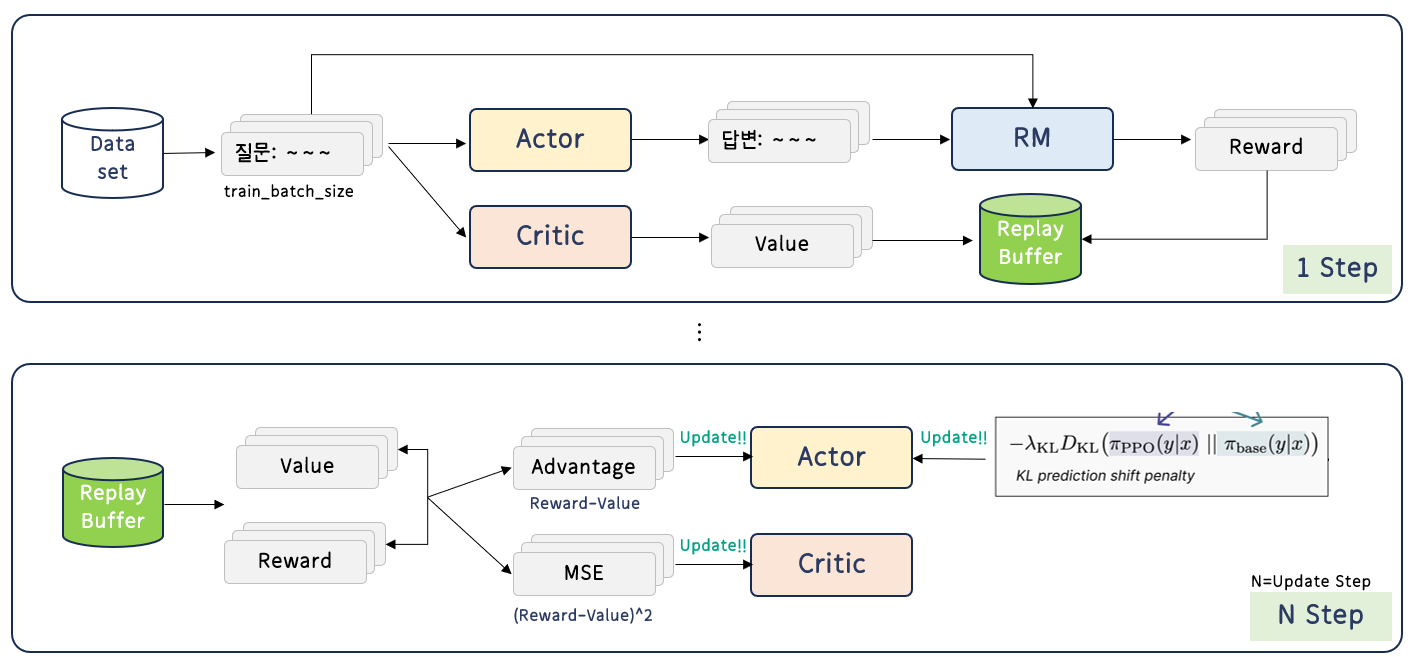

In [ ]:
# 79: 강화학습을 위한 파라미터 설정

# 데이터 경로 확인!!!!!!!
parser = argparse.ArgumentParser()
parser.add_argument('--train_data_path_ppo', type=str, default='/content/drive/MyDrive/mygpt-lecture/data/stage3. PPO/ive_train_ppo.jsonl') # 강화학습용 학습 데이터
parser.add_argument('--test_data_path_ppo', type=str, default='/content/drive/MyDrive/mygpt-lecture/data/stage3. PPO/ive_test_ppo.jsonl') # 강화학습용 테스트 데이터
parser.add_argument('--output_dir', type=str, default='/content/drive/MyDrive/mygpt-lecture/output/PPO_model') # 학습이 끝난 모델이 저장 될 경로
parser.add_argument('--model', type=str, default='gpt2')
parser.add_argument('--pretrain', type=str, default=None)
parser.add_argument('--num_episodes', type=int, default=5)
parser.add_argument('--max_timesteps', type=int, default=6)
parser.add_argument('--update_timesteps', type=int, default=3)
parser.add_argument('--max_epochs', type=int, default=1)
parser.add_argument('--train_batch_size', type=int, default=6)
parser.add_argument('--lora_rank', type=int, default=0) # 0 = 사용안함
parser.add_argument('--max_length', type=int, default=256)
parser.add_argument('--lr', type=float, default=3e-6)

parser.add_argument('--pretrain_actor', type=str, default='/content/drive/MyDrive/mygpt-lecture/output/domain_instruction_tuning/')  # SFT 모델 가져오기
parser.add_argument('--pretrain_critic', type=str, default='/content/drive/MyDrive/mygpt-lecture/output/rm_model') # Reward Model 가져오기
args = parser.parse_args(args=[])

print(args)
if not os.path.exists(args.output_dir):
    os.makedirs(args.output_dir)

Namespace(train_data_path_ppo='/content/drive/MyDrive/mygpt-lecture/data/stage3. PPO/ive_train_ppo.jsonl', test_data_path_ppo='/content/drive/MyDrive/mygpt-lecture/data/stage3. PPO/ive_test_ppo.jsonl', output_dir='/content/drive/MyDrive/mygpt-lecture/output/PPO_model', model='gpt2', pretrain=None, num_episodes=5, max_timesteps=6, update_timesteps=3, max_epochs=1, train_batch_size=6, lora_rank=0, max_length=256, lr=3e-06, pretrain_actor='/content/drive/MyDrive/mygpt-lecture/output/domain_instruction_tuning/', pretrain_critic='/content/drive/MyDrive/mygpt-lecture/output/rm_model')


In [ ]:
# 80: actor, critic, initial model, reward model 로드 및 Configuration
strategy = NaiveStrategy()
with strategy.model_init_context():
    actor = GPTActor(pretrained=args.pretrain_actor).to(torch.cuda.current_device())
    critic = GPTCritic(pretrained=args.pretrain_critic).to(torch.cuda.current_device())
    initial_model = deepcopy(actor)
    reward_model = RewardModel(deepcopy(critic.model), deepcopy(critic.value_head)).to(torch.cuda.current_device())

# configure optimizer
actor_optim = AdamW(actor.parameters(), lr=args.lr)
critic_optim = AdamW(critic.parameters(), lr=args.lr)

# setting the models
(actor, actor_optim), (critic, critic_optim), reward_model, initial_model = strategy.prepare((actor, actor_optim), (critic, critic_optim), reward_model, initial_model)

In [ ]:
# 81: 강화학습용 데이터에 전처리

# 본인의 데이터에 맞게 Prompt 변경!
PROMPT= "### system:당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 대해 사실대로 답변하세요.\n### 사용자:{instruction}\n### 응답:"

train_ppo=[]
for a in open(args.train_data_path_ppo, 'r'):
    train_ppo.append(PROMPT.format_map({'instruction':json.loads(a)['prompt']}))

test_ppo=[]
for a in open(args.test_data_path_ppo, 'r'):
    test_ppo.append(PROMPT.format_map({'instruction':json.loads(a)['prompt']}))

def tokenize_fn(texts):
    batch = tokenizer(texts, return_tensors='pt', max_length=args.max_length, padding=True, truncation=True)
    return {k: v.cuda() for k, v in batch.items()}

In [ ]:
# Dataset Size
print("Train set Size:", len(train_ppo))
print("Test set Size:",len(test_ppo))

Train set Size: 480
Test set Size: 20


In [ ]:
# 데이터 예시(Only 질문만!!)
print(random.sample(train_ppo, 1)[0])

### system:당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 대해 사실대로 답변하세요.
### 사용자:아이브의 비주얼을 해석할 때 각 멤버의 차별적인 특징은 무엇일까요?
### 응답:


In [ ]:
# 82: configure trainer & 학습 시작
trainer = PPOTrainer(strategy,
                     actor,
                     critic,
                     reward_model,
                     initial_model,
                     actor_optim,
                     critic_optim,
                     max_epochs=args.max_epochs,
                     train_batch_size=6,
                     tokenizer=tokenize_fn,
                     max_length=args.max_length,
                     do_sample=True,
                     temperature=1.0,
                     top_k=50,
                     pad_token_id=tokenizer.pad_token_id,
                     eos_token_id=tokenizer.eos_token_id)

# train!
trainer.fit(train_ppo,  # 입력 prompt
            num_episodes=args.num_episodes,
            max_timesteps=args.max_timesteps,
            update_timesteps=args.update_timesteps)

Episode [5/5]: 100%|██████████| 6/6 [02:14<00:00, 22.45s/it]


In [ ]:
# 83: 학습이 끝난 모델 저장

# Actor만 저장합니다!
actor.model.save_pretrained(args.output_dir)

#### SFT vs PPO Inference 비교

In [ ]:
# 84: 두가지 모델로 추론 결과를 뽑습니다. (시간 소요)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id, # \n
    max_new_tokens=256,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

## PPO (강화학습)
generator_ppo = pipeline('text-generation', model=args.output_dir , tokenizer=tokenizer)
list_result_ppo = generator_ppo(test_ppo, **generation_args)

## SFT (Supervised Fine-tuned Model)
generator_sft = pipeline('text-generation', model=args.pretrain_actor, tokenizer=tokenizer) # Q: SFT를 테스트 해야 하는데 Actor를 왜 넣을까요?
list_result_sft = generator_sft(test_ppo, **generation_args)

In [ ]:
# 85: 강화학습 vs SFT 모델 간 결과 비교

for prompt, ppo_result, sft_result in zip(test_ppo, list_result_ppo, list_result_sft):
    print(('-'*70))
    print(prompt)
    print("PPO: ",ppo_result[0]['generated_text'].replace(prompt,""))
    print("SFT: ",sft_result[0]['generated_text'].replace(prompt,""))

----------------------------------------------------------------------
### system:당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 대해 사실대로 답변하세요.
### 사용자:표정 연기가 무대 전반의 분위기나 이야기 전달에 어떤 영향을 미치는지 알려주세요.
### 응답:
PPO:  안유진과 장원영의 팬덤 화력이 더해져 표정이 더욱 강렬해졌습니다.
SFT:  안유진과 장원영의 팬덤 화력, 아이즈원 출신이 아닌 새로운 멤버를 통해 유입된 신규팬덤의 화력이 더해져 있습니다.
----------------------------------------------------------------------
### system:당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 대해 사실대로 답변하세요.
### 사용자:아이브가 향후 어떤 방식으로 발전하고 성장해 나갈 것으로 예상되는가요?
### 응답:
PPO:  향후 몇 년 동안 아이브는 다양한 음악 스타일과 플랫폼에서 강력한 입지를 구축할 것으로 예상됩니다. 예를 들어, Spotify 글로벌 차트 23위, 미국 차트 82위에 올랐습니다.
SFT:  향후 몇 년 동안 아이브는 더욱 대중성 있고 트렌디한 콘셉트로 발전할 것으로 예상됩니다.
----------------------------------------------------------------------
### system:당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 대해 사실대로 답변하세요.
### 사용자:IVE의 멤버 중에서 가장 먼저 지상파 음악 방송 1위를 기록한 멤버가 누구였나요?
### 응답:
PPO:  지상파 음악 방송 1위 최연소, 차연소 기록을 갖고 있는
SFT:  장원영과 안유진이 지상파 음악방송 1위 최연소, 차연소 기록을 가지고 있었습니다.
---------------------------------------------------------------

#### [참고] Pipeline 없이 Inference 하는 법

In [ ]:
## inference
def generation(model, input_text):
    input_ids = tokenizer(input_text, return_tensors='pt').to(
        torch.cuda.current_device())

    outputs = model.generate(**input_ids,
                             num_beams=4,
                            repetition_penalty=2.0,
                            no_repeat_ngram_size=4,
                            eos_token_id=tokenizer.eos_token_id,
                            max_new_tokens=256,
                            do_sample=True,
                            top_k=50,
                            early_stopping=True
                             )

    # print(outputs)
    output = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    print('#' * 70)
    print(output)
    return output

from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained(args.output_dir).to('cuda').eval()

for input_text in test_ppo:
    output = generation(model, input_text)

######################################################################
['### system:당신은 국선도 전문가입니다. 국선도에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.\n### 사용자:국선도는 어떤 사람들에게 추천되는 수련법인가요?\n### 응답:국선도(밝돌법)는 사람들이 수련하여 건강해질 수 있는 수련법이다.']
######################################################################
['### system:당신은 국선도 전문가입니다. 국선도에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.\n### 사용자:밝돌법이라는 이름의 유래는 무엇인가요?\n### 응답:도인도송 내용에서 국선도법(밝돌법)은 인도송 내용에서 유래했습니다.']
######################################################################
['### system:당신은 국선도 전문가입니다. 국선도에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.\n### 사용자:국선도를 통해 건강한 몸을 유지하는 방법은 무엇인가요?\n### 응답:국선도에서 건강한 몸을 유지하는 방법에는 여러 가지가 있습니다.']
######################################################################
['### system:당신은 국선도 전문가입니다. 국선도에 대한 사용자의 질문에 대해 적절한 응답을 생성하세요.\n### 사용자:국선도를 수행하는 데 필요한 시간과 노력은 어느 정도인가요?\n### 응답:국선도의 수행을 위해서는 중기단법(中氣丹法), 건곤단법(乾坤丹法), 진공단법(眞空丹法)이 필요합니다.']
######################################################################
['### system:당신은 국선도 전문가입니다. 국선